In [1]:
import os
import numpy as np
from MEC import MEC_predict, get_MIDI_features, get_info
import pretty_midi
from IPython import display

_SAMPLING_RATE = 16000

def play_audio(file_path, seconds=30):
  pm = pretty_midi.PrettyMIDI(file_path)
  waveform = pm.fluidsynth(fs=_SAMPLING_RATE)
  # Take a sample of the generated waveform to mitigate kernel resets
  waveform_short = waveform[:seconds*_SAMPLING_RATE]
  return display.Audio(waveform_short, rate=_SAMPLING_RATE)

In [2]:
model_path = "/Users/alexto/Documents/ProgrammingProjects/Emotion-based-Music-Provider/Music_Generation/MEC_model.h5"
midi_folder_path = "/Users/alexto/Documents/ProgrammingProjects/Emotion-based-Music-Provider/Music_Generation/midi_data/pianos"

emotion_class = ['Happiness', 'Angry', 'Sadness', 'Calmness']

midi_data_list = get_info(model_path, midi_folder_path, 1, emotion_class)


"""
Note Density: How many notes in one beat
Note Length: How long is one note (in beat unit)
Note Velocity: Volume [0, 127]
Pitch: [0, 127]

https://computermusicresource.com/midikeys.html
Scale: [0, 12) -> C, C#, D, D#, E, F, F#, G, G#, A, A#, B
Major: Minor = 0, Major = 1
80% Pitch Range: Middle 80% pitch range
Polyphony: Average Number of pitch per second (1.0 = Mono)
Pitch Entropy: IGNORE
Groove Consistency: Groove consistence or not (hamming distance)
"""

Empty notes per beat detected
Empty notes per beat detected
Empty notes per beat detected
Empty notes per beat detected
Empty notes per beat detected
Empty notes per beat detected
Empty notes per beat detected
Empty notes per beat detected
Empty notes per beat detected
Empty notes per beat detected
Empty notes per beat detected
Empty notes per beat detected
Empty notes per beat detected
Empty notes per beat detected
Empty notes per beat detected
Empty notes per beat detected
Empty notes per beat detected
Empty notes per beat detected
Empty notes per beat detected
Empty notes per beat detected
Empty notes per beat detected
Empty notes per beat detected
Empty notes per beat detected
Empty notes per beat detected


2023-03-09 01:44:04.456256: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


'\nNote Density: How many notes in one beat\nNote Length: How long is one note (in beat unit)\nNote Velocity: Volume [0, 127]\nPitch: [0, 127]\n\nhttps://computermusicresource.com/midikeys.html\nScale: [0, 12) -> C, C#, D, D#, E, F, F#, G, G#, A, A#, B\nMajor: Minor = 0, Major = 1\n80% Pitch Range: Middle 80% pitch range\nPolyphony: Average Number of pitch per second (1.0 = Mono)\nPitch Entropy: IGNORE\nGroove Consistency: Groove consistence or not (hamming distance)\n'

In [3]:
midi_data_list

[{'note_density_avg': 1.1135802469135803,
  'note_density_sd': 0.5460866585278945,
  'note_length_avg': 1.2106991620575216,
  'note_length_sd': 0.8191666955241266,
  'note_velocity_avg': 50.349557522123895,
  'note_velocity_sd': 12.335534854970646,
  'pitch_avg': 60.741150442477874,
  'pitch_sd': 6.974465850351628,
  'scale': 1,
  'major_minor': 1,
  '80%_pitch_range': 24,
  'polyphony': 3.7204794847328246,
  'pitch_entropy': 4.5311539355612425,
  'groove_consistency': 0.9951536643026004,
  'emotion_percentages': [0.0007558183278888464,
   0.0013354282127693295,
   0.08754058927297592,
   0.9103682041168213],
  'emotion': 'Calmness',
  'filename': 'TRAAYGT128F4262DDF_0.mid',
  'file_path': '/Users/alexto/Documents/ProgrammingProjects/Emotion-based-Music-Provider/Music_Generation/midi_data/pianos/Calmness/TRAAYGT128F4262DDF_0.mid'},
 {'note_density_avg': 1.0186170212765957,
  'note_density_sd': 0.1988643345098949,
  'note_length_avg': 0.7156269151475695,
  'note_length_sd': 0.5108317120

In [6]:
len(midi_data_list)

3207

In [5]:
import json

with open("processed_data_info.json", "w") as fp:
  json.dump(midi_data_list, fp) 

# Data Exploration

## Major Minor Scale bar graph

In [15]:
import matplotlib.pyplot as plt

label = ["-C", "-C#", "-D", "-D#", "-E", "-F", "-F#", "-G", "-G#", "-A", "-A#", "-B", "C", "C#", "D", "D#", "E", "F", "F#", "G", "G#", "A", "A#", "B"]
angry = [ 0 for i in range(24) ]
happiness = [ 0 for i in range(24) ]
calmness = [ 0 for i in range(24) ]
sadness = [ 0 for i in range(24) ]

for midi in midi_data_list:
  num = midi['major_minor'] * 12 + midi['scale']
  if (midi['emotion'] == 'Angry'):
    angry[num] += 1
  elif (midi['emotion'] == 'Happiness'):
    happiness[num] += 1
  elif (midi['emotion'] == 'Calmness'):
    calmness[num] += 1
  elif (midi['emotion'] == 'Sadness'):
    sadness[num] += 1

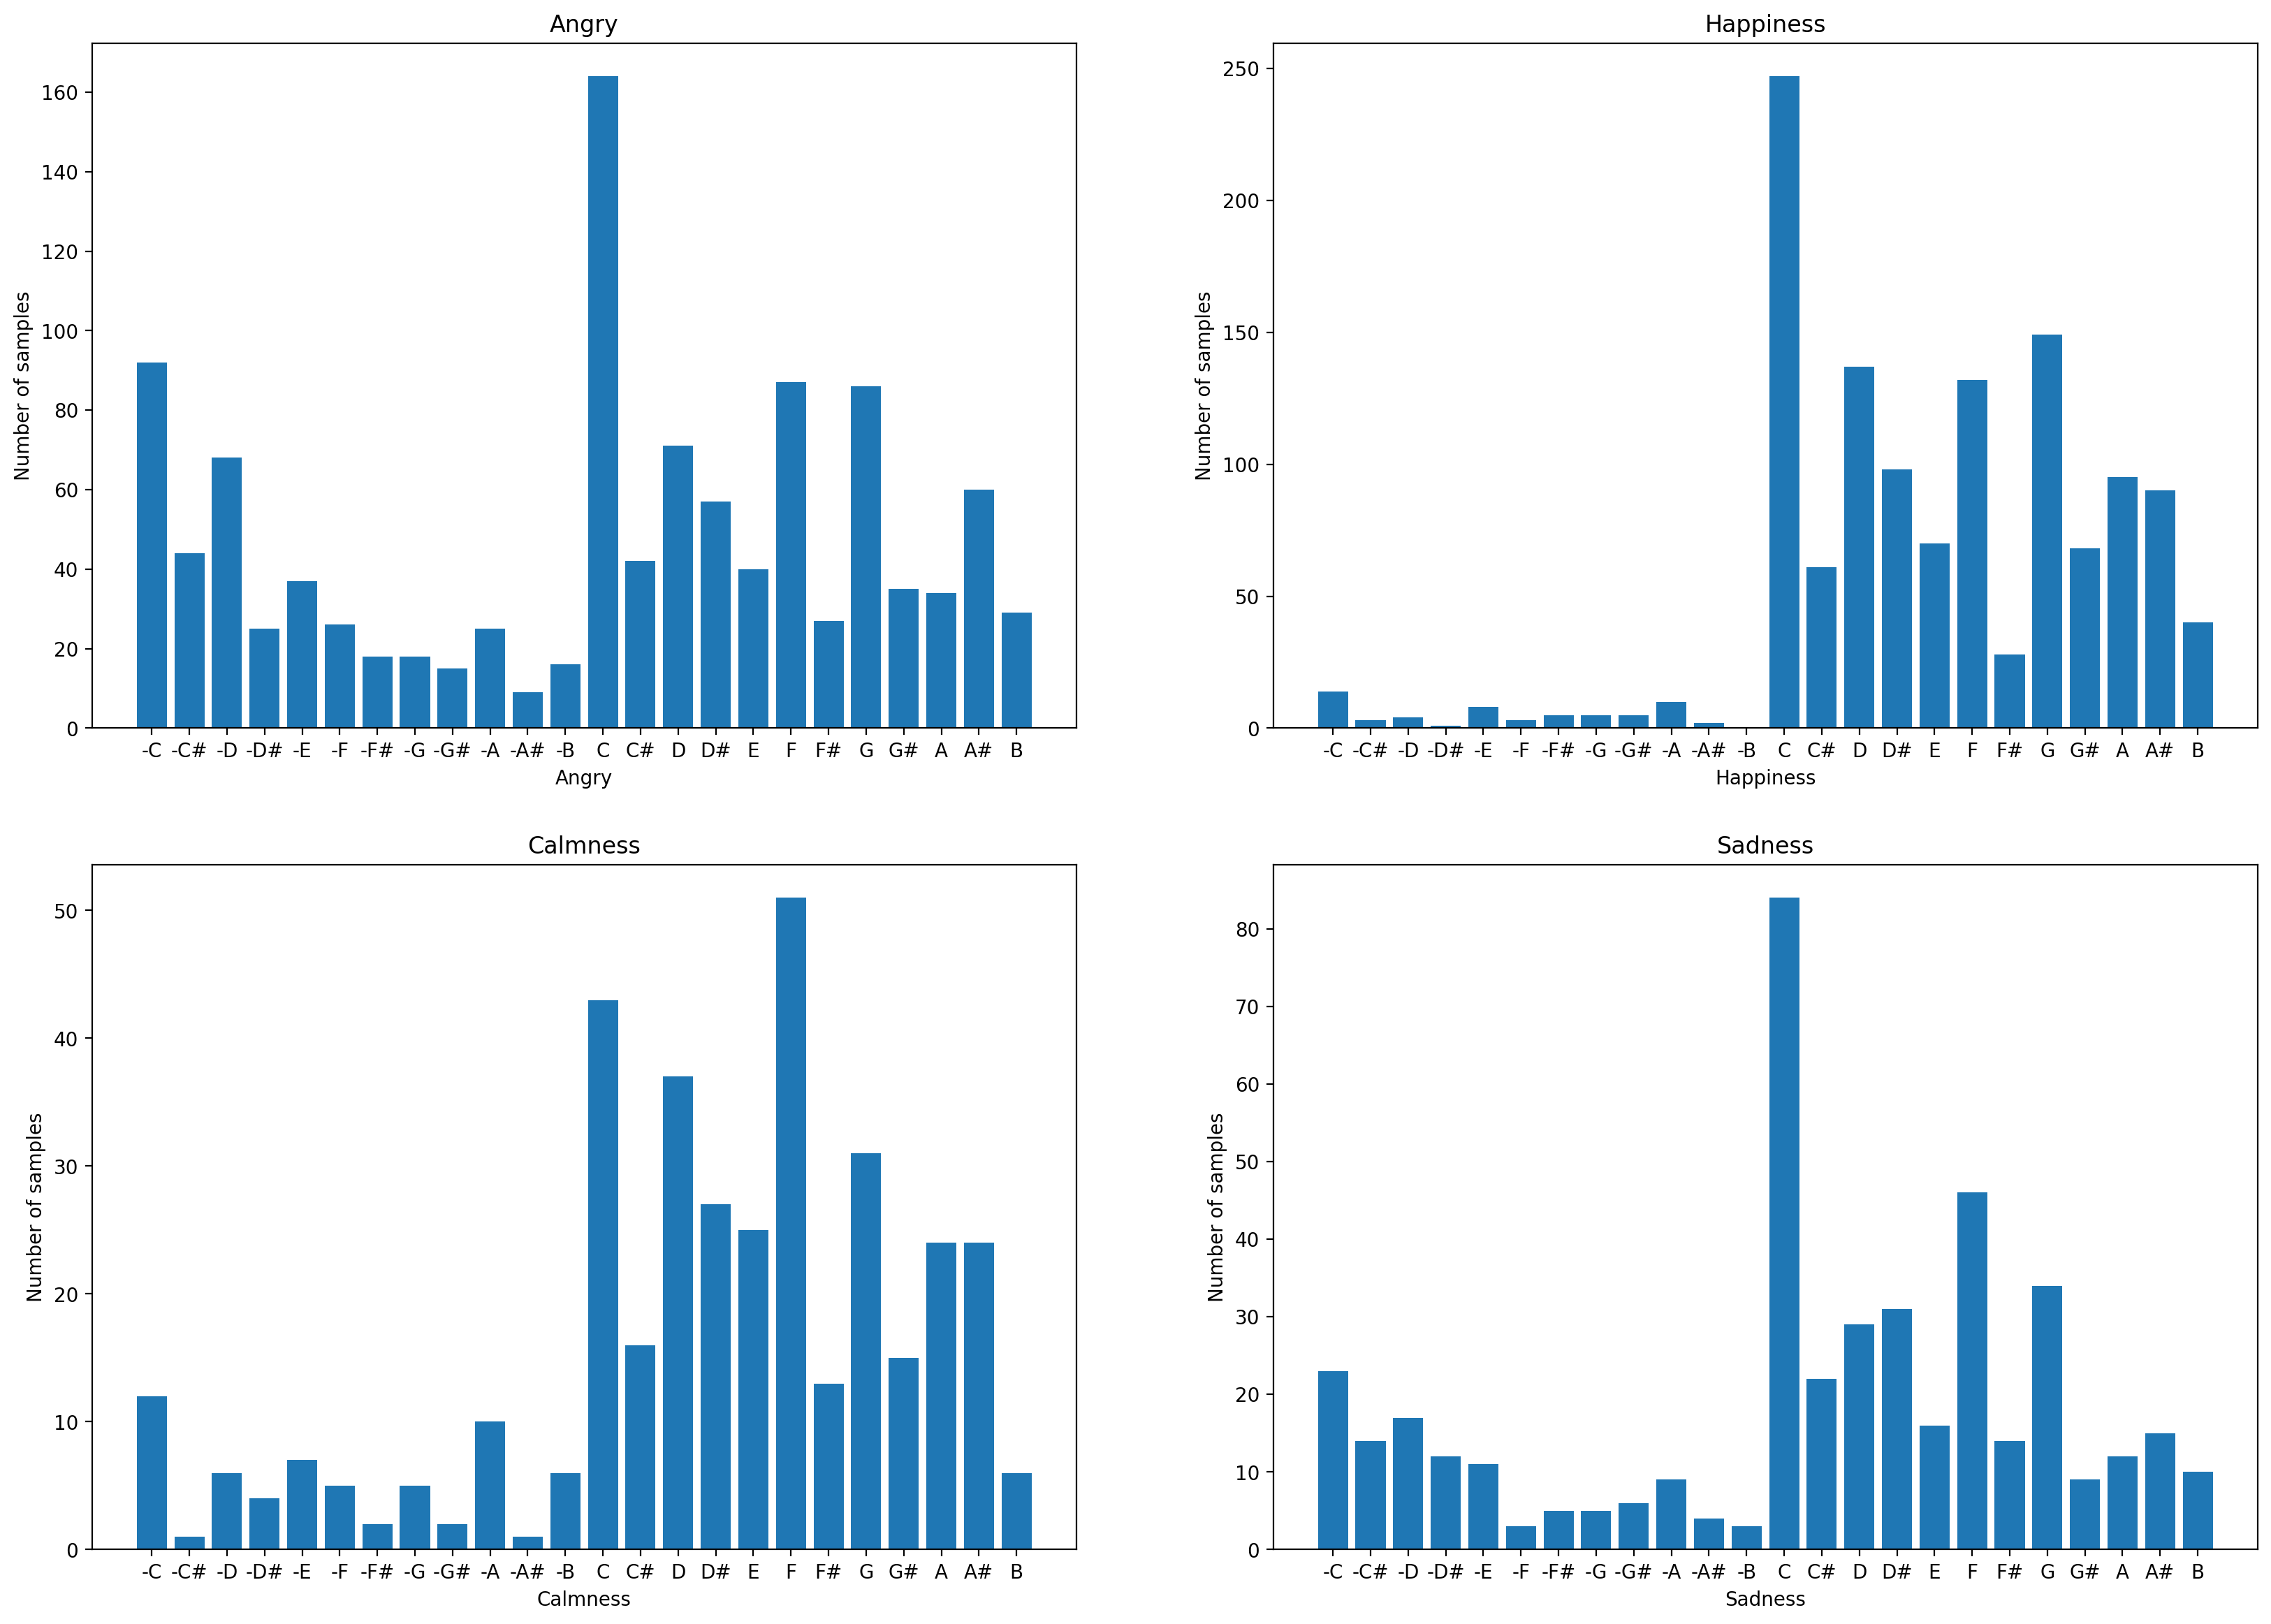

In [22]:

fig, axs = plt.subplots(2, 2, figsize=(20, 14))
axs[0, 0].bar(label, angry)
axs[0, 0].set_xlabel('Angry')
axs[0, 0].set_ylabel('Number of samples')
axs[0, 0].set_title('Angry')

axs[0, 1].bar(label, happiness)
axs[0, 1].set_xlabel('Happiness')
axs[0, 1].set_ylabel('Number of samples')
axs[0, 1].set_title('Happiness')

axs[1, 0].bar(label, calmness)
axs[1, 0].set_xlabel('Calmness')
axs[1, 0].set_ylabel('Number of samples')
axs[1, 0].set_title('Calmness')

axs[1, 1].bar(label, sadness)
axs[1, 1].set_xlabel('Sadness')
axs[1, 1].set_ylabel('Number of samples')
axs[1, 1].set_title('Sadness')
plt.show()

## Plot violin

In [69]:
import matplotlib.pyplot as plt

def box_plot(ax, points, name):
  vp = ax.boxplot(points, positions=[2, 4, 6, 8], widths=1.5, patch_artist=True,
                  showmeans=True, showfliers=False,
                  medianprops={"color": "white", "linewidth": 0.5},
                  boxprops={"facecolor": "C0", "edgecolor": "white",
                            "linewidth": 1.0},
                  whiskerprops={"color": "C0", "linewidth": 1.5},
                  capprops={"color": "C0", "linewidth": 1.5})

  # ax.set_ylim((0, 6))
  ax.set_xticklabels(('Angry', 'Happiness', 'Calmness', 'Sadness'))
  ax.set_title(name)
  ax.set_xlabel('Emotions')
  ax.set_ylabel(name)

  return ax, vp

def violin_plot(ax, points, name):
  vp = ax.violinplot(points, [2, 4, 6, 8], widths=2,
                    showmeans=True, showmedians=True, showextrema=True)
  for body in vp['bodies']:
    body.set_alpha(0.9)

  # ax.set_ylim((0, 6))
  ax.set_xticklabels(('', '',  'Angry', '', 'Happiness', '', 'Calmness', '', 'Sadness'))
  ax.set_title(name)
  ax.set_xlabel('Emotions')
  ax.set_ylabel(name)

  return ax, vp

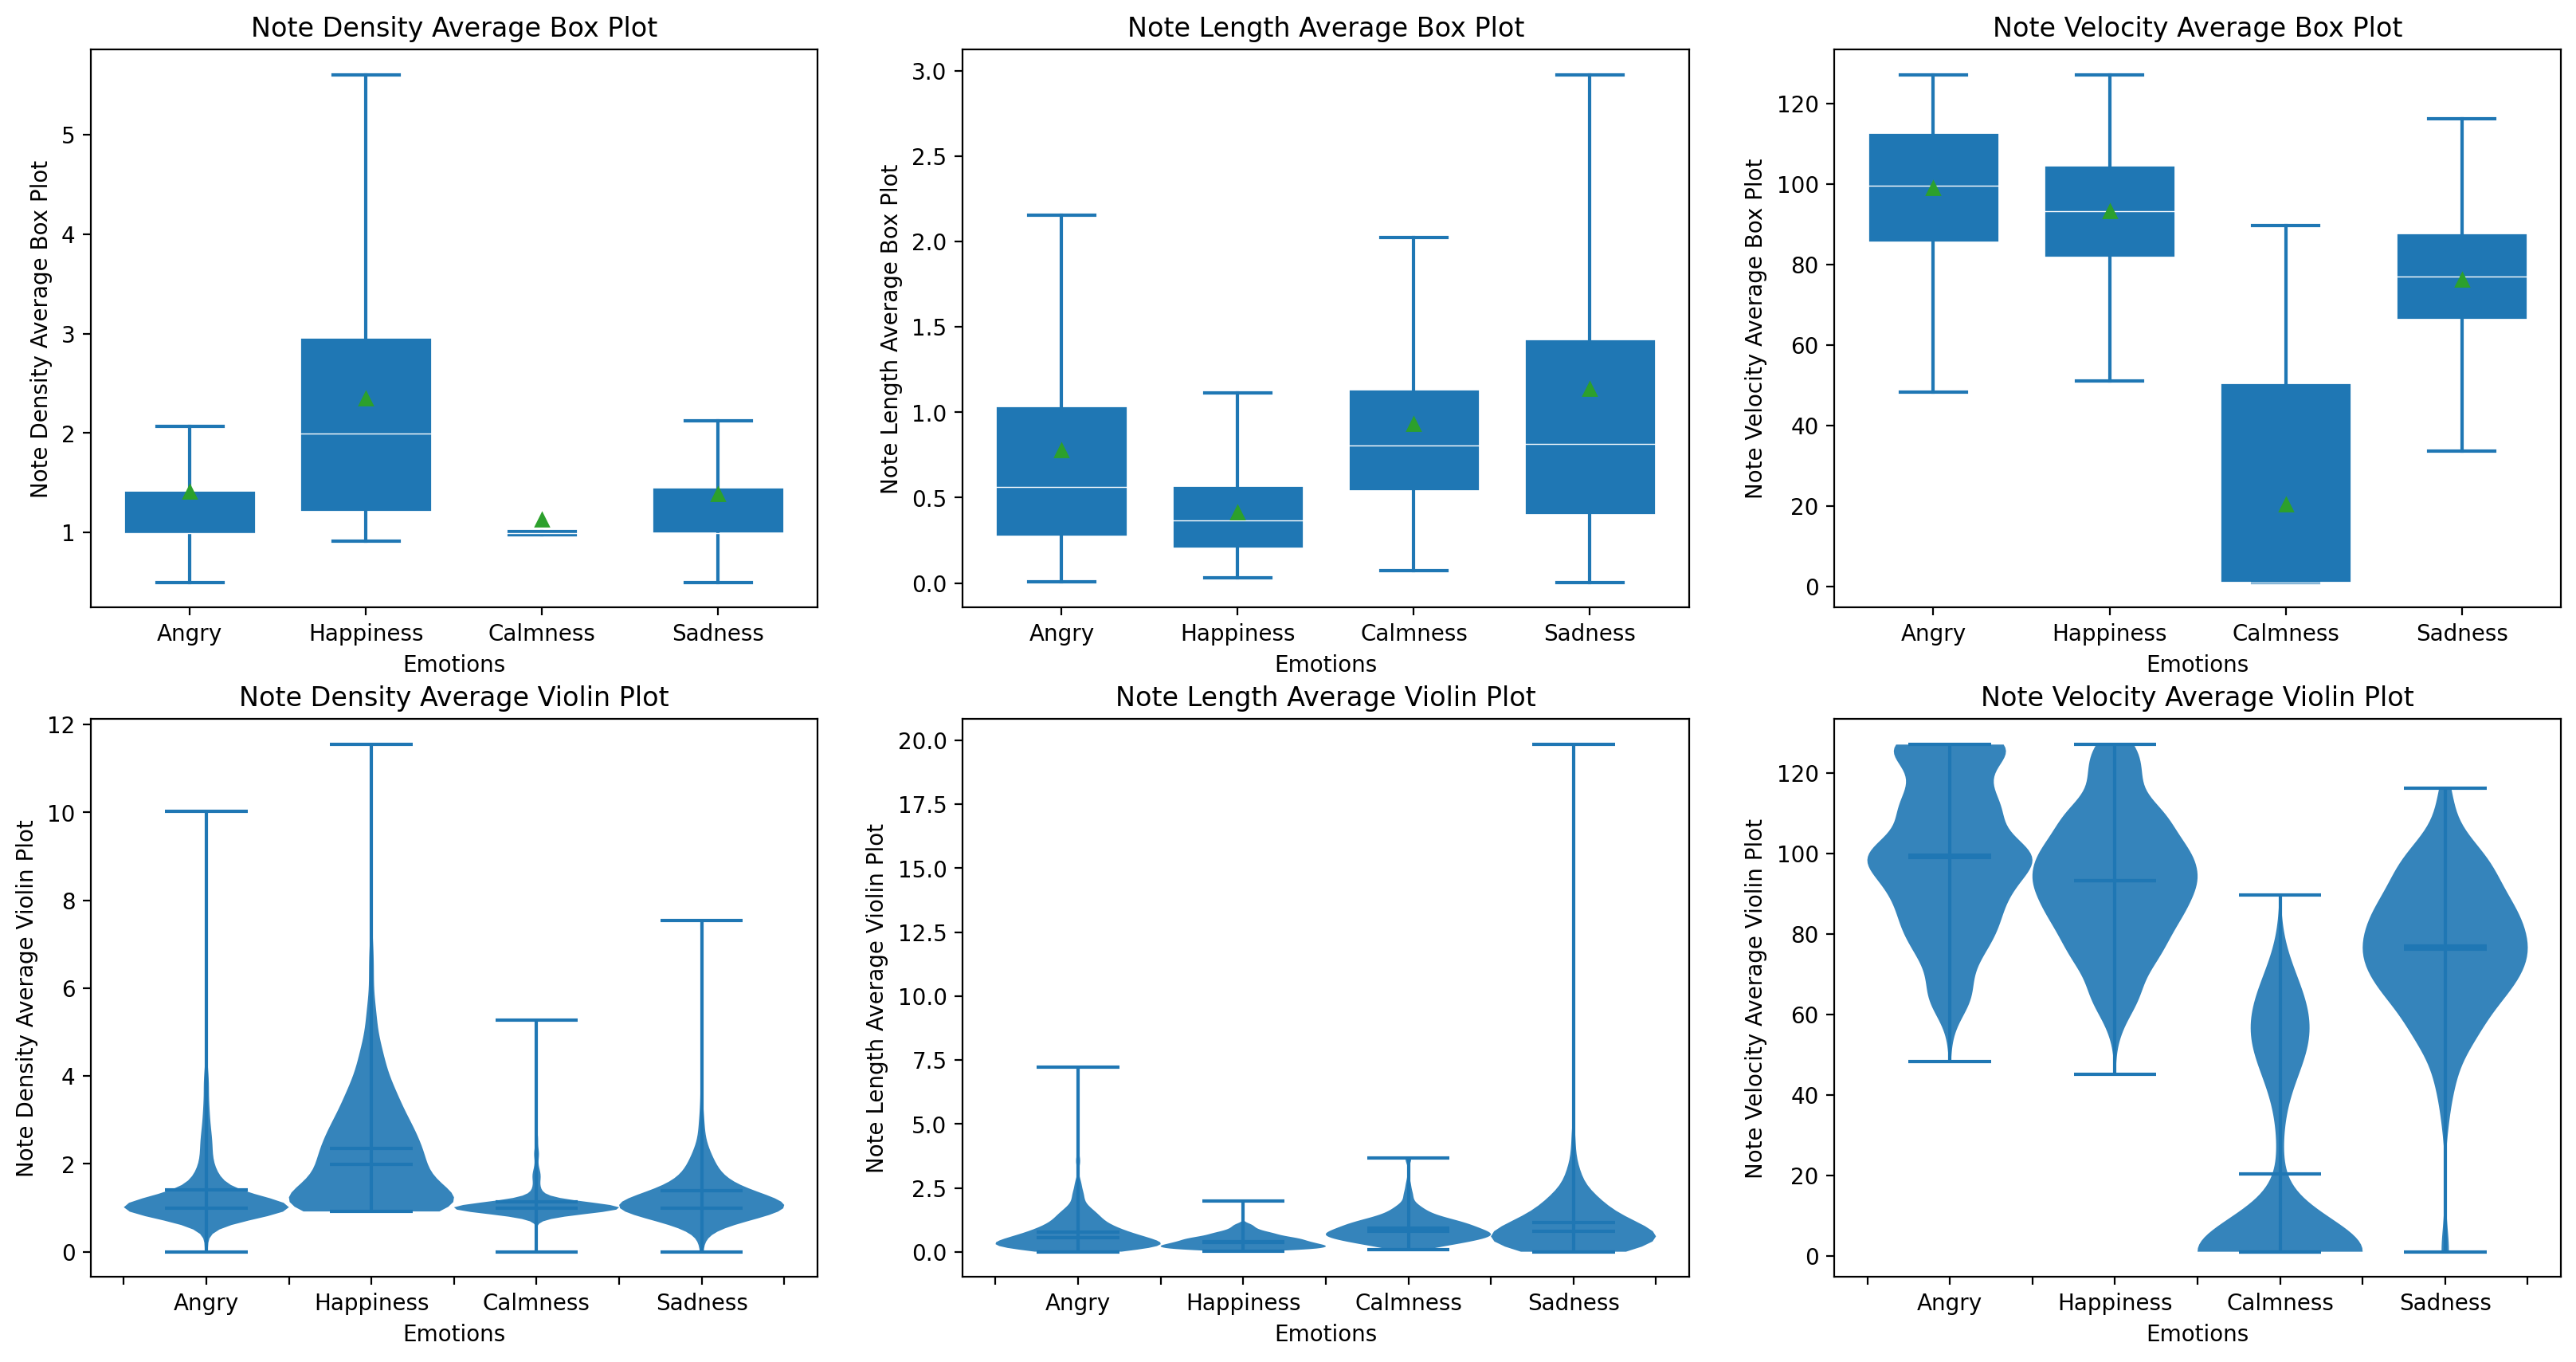

In [70]:
fig, ax = plt.subplots(2, 3, figsize=(20, 10))

# Note density average
angry = []
happiness = []
calmness = []
sadness = []

for midi in midi_data_list:
  num = midi['note_density_avg']
  if (midi['emotion'] == 'Angry'):
    angry.append(num)
  elif (midi['emotion'] == 'Happiness'):
    happiness.append(num)
  elif (midi['emotion'] == 'Calmness'):
    calmness.append(num)
  elif (midi['emotion'] == 'Sadness'):
    sadness.append(num)

points = (angry, happiness, calmness, sadness)
ax[0, 0], vp = box_plot(ax[0, 0], points, 'Note Density Average Box Plot')


# Note length average
angry = []
happiness = []
calmness = []
sadness = []

for midi in midi_data_list:
  num = midi['note_length_avg']
  if (midi['emotion'] == 'Angry'):
    angry.append(num)
  elif (midi['emotion'] == 'Happiness'):
    happiness.append(num)
  elif (midi['emotion'] == 'Calmness'):
    calmness.append(num)
  elif (midi['emotion'] == 'Sadness'):
    sadness.append(num)

points = (angry, happiness, calmness, sadness)
ax[0, 1], vp = box_plot(ax[0, 1], points, 'Note Length Average Box Plot')


# Note velocity average
angry = []
happiness = []
calmness = []
sadness = []

for midi in midi_data_list:
  num = midi['note_velocity_avg']
  if (midi['emotion'] == 'Angry'):
    angry.append(num)
  elif (midi['emotion'] == 'Happiness'):
    happiness.append(num)
  elif (midi['emotion'] == 'Calmness'):
    calmness.append(num)
  elif (midi['emotion'] == 'Sadness'):
    sadness.append(num)

points = (angry, happiness, calmness, sadness)
ax[0, 2], vp = box_plot(ax[0, 2], points, 'Note Velocity Average Box Plot')




# Note density average
angry = []
happiness = []
calmness = []
sadness = []

for midi in midi_data_list:
  num = midi['note_density_avg']
  if (midi['emotion'] == 'Angry'):
    angry.append(num)
  elif (midi['emotion'] == 'Happiness'):
    happiness.append(num)
  elif (midi['emotion'] == 'Calmness'):
    calmness.append(num)
  elif (midi['emotion'] == 'Sadness'):
    sadness.append(num)

points = (angry, happiness, calmness, sadness)
ax[1, 0], vp = violin_plot(ax[1, 0], points, 'Note Density Average Violin Plot')


# Note length average
angry = []
happiness = []
calmness = []
sadness = []

for midi in midi_data_list:
  num = midi['note_length_avg']
  if (midi['emotion'] == 'Angry'):
    angry.append(num)
  elif (midi['emotion'] == 'Happiness'):
    happiness.append(num)
  elif (midi['emotion'] == 'Calmness'):
    calmness.append(num)
  elif (midi['emotion'] == 'Sadness'):
    sadness.append(num)

points = (angry, happiness, calmness, sadness)
ax[1, 1], vp = violin_plot(ax[1, 1], points, 'Note Length Average Violin Plot')


# Note velocity average
angry = []
happiness = []
calmness = []
sadness = []

for midi in midi_data_list:
  num = midi['note_velocity_avg']
  if (midi['emotion'] == 'Angry'):
    angry.append(num)
  elif (midi['emotion'] == 'Happiness'):
    happiness.append(num)
  elif (midi['emotion'] == 'Calmness'):
    calmness.append(num)
  elif (midi['emotion'] == 'Sadness'):
    sadness.append(num)

points = (angry, happiness, calmness, sadness)
ax[1, 2], vp = violin_plot(ax[1, 2], points, 'Note Velocity Average Violin Plot')

plt.show()

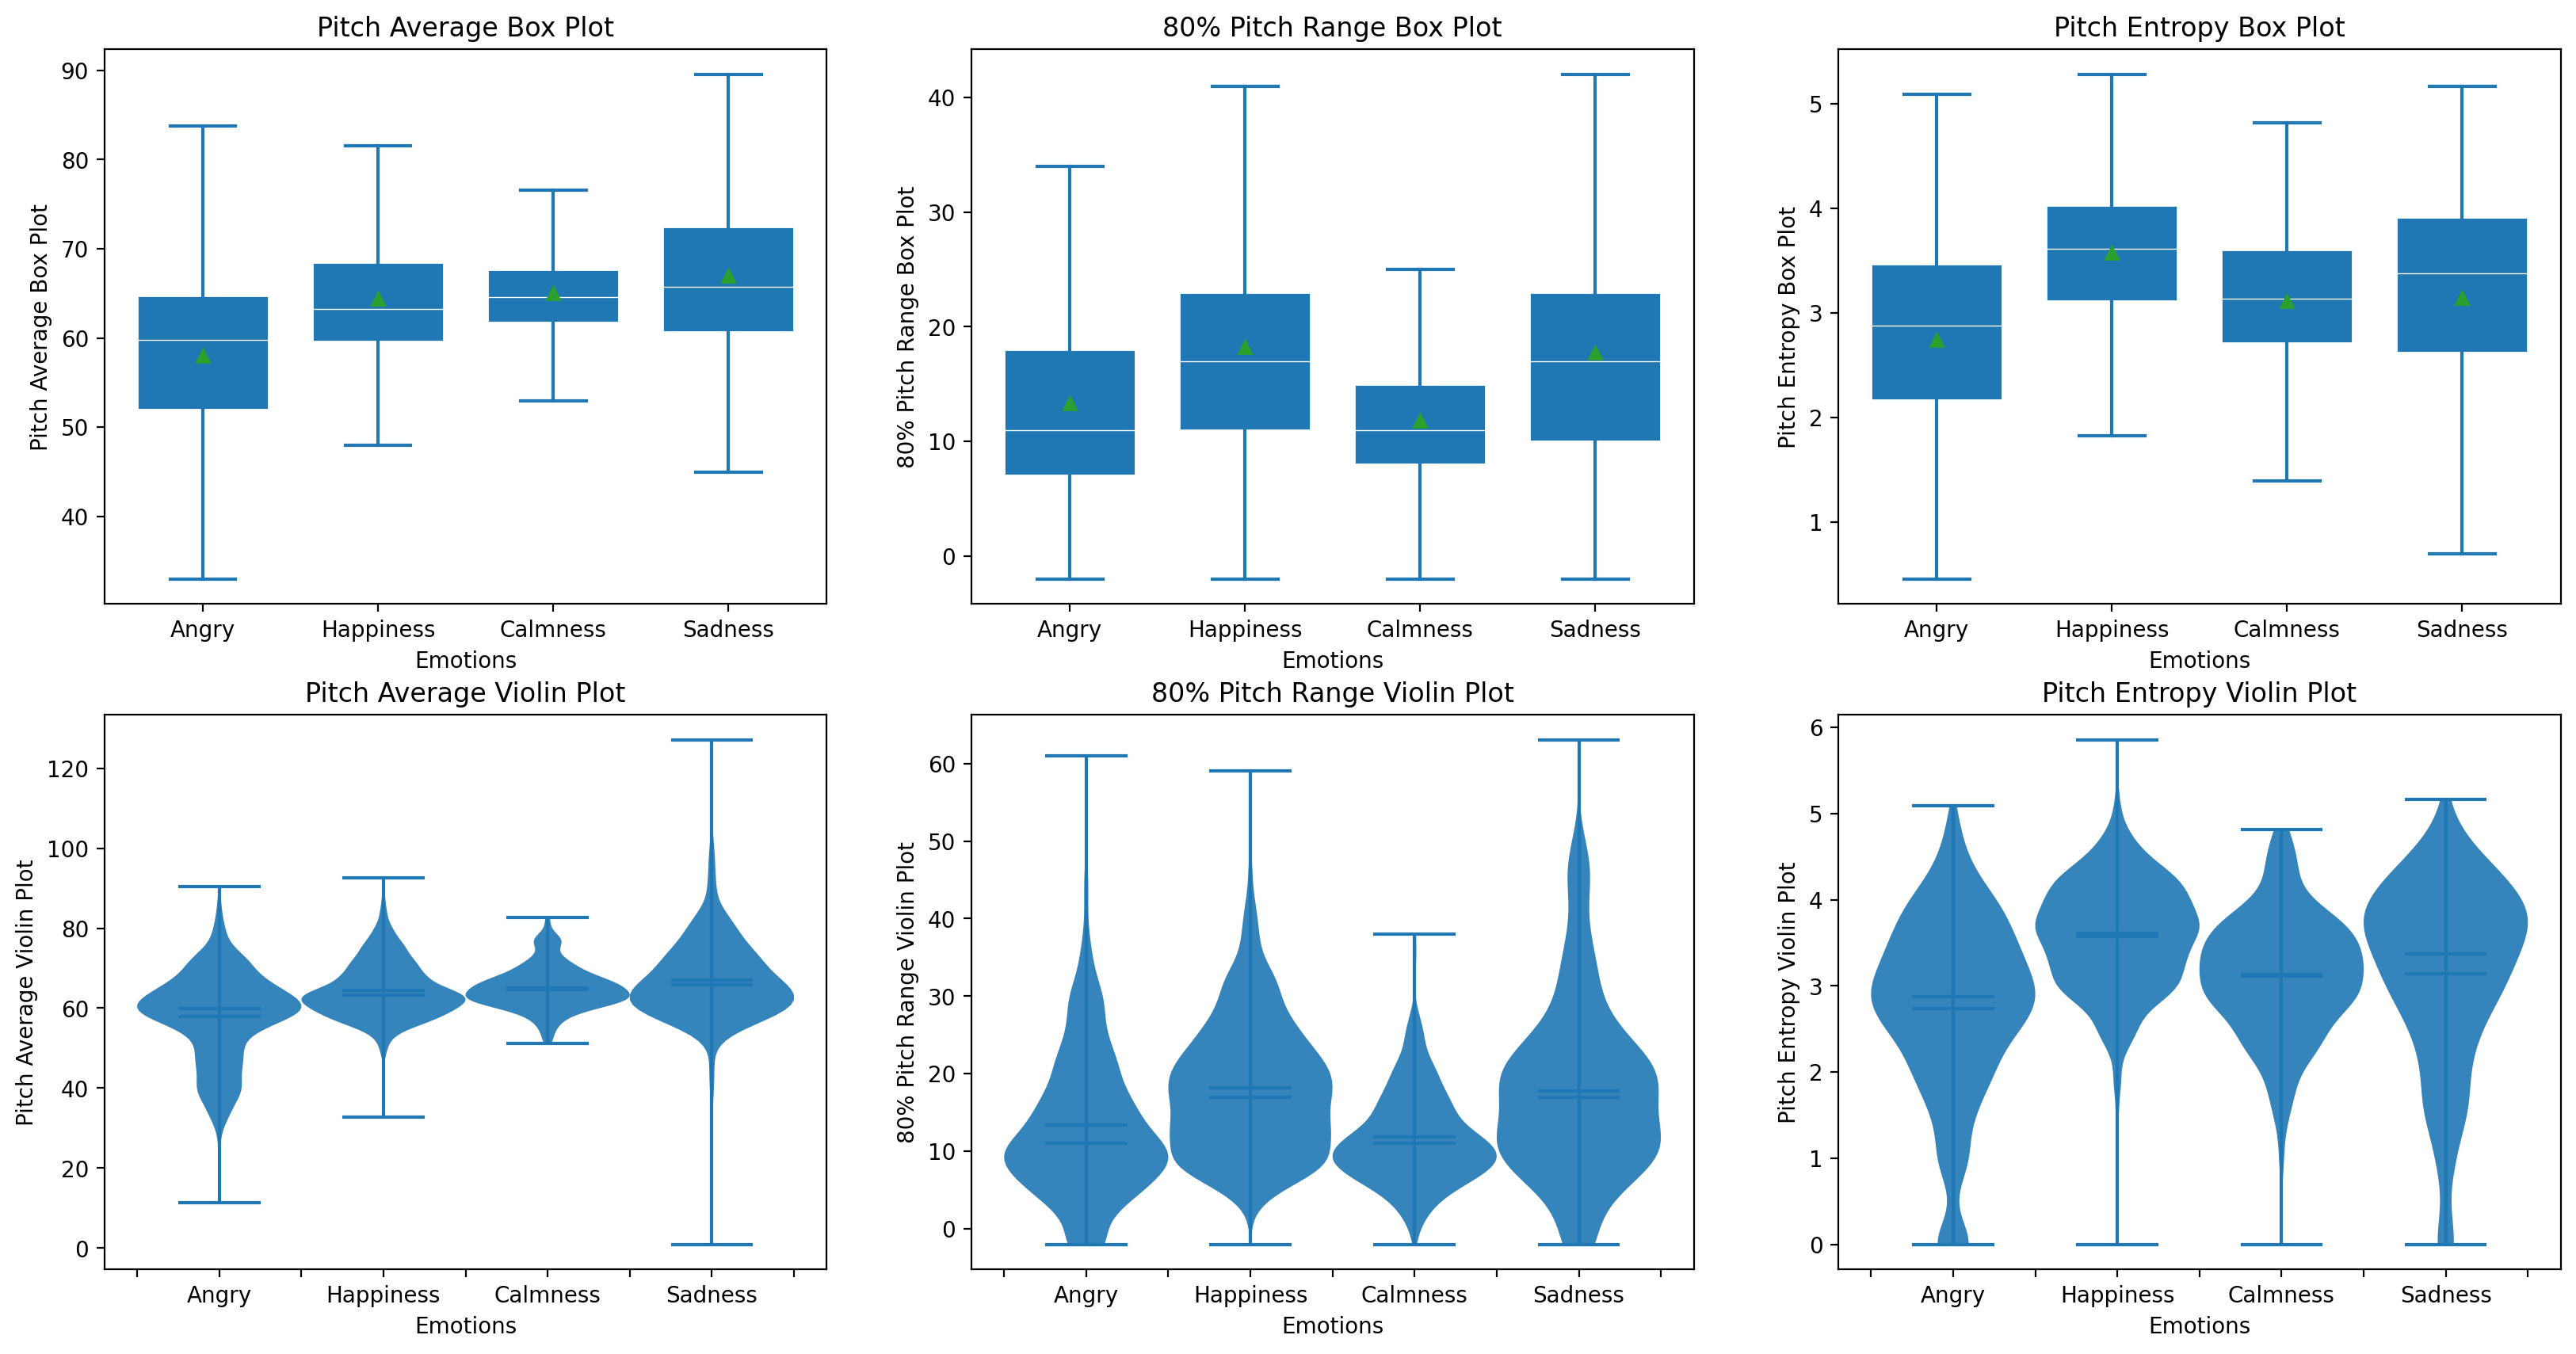

In [71]:
fig, ax = plt.subplots(2, 3, figsize=(20, 10))

# Note density average
angry = []
happiness = []
calmness = []
sadness = []

for midi in midi_data_list:
  num = midi['pitch_avg']
  if (midi['emotion'] == 'Angry'):
    angry.append(num)
  elif (midi['emotion'] == 'Happiness'):
    happiness.append(num)
  elif (midi['emotion'] == 'Calmness'):
    calmness.append(num)
  elif (midi['emotion'] == 'Sadness'):
    sadness.append(num)

points = (angry, happiness, calmness, sadness)
ax[0, 0], vp = box_plot(ax[0, 0], points, 'Pitch Average Box Plot')


# Note length average
angry = []
happiness = []
calmness = []
sadness = []

for midi in midi_data_list:
  num = midi['80%_pitch_range']
  if (midi['emotion'] == 'Angry'):
    angry.append(num)
  elif (midi['emotion'] == 'Happiness'):
    happiness.append(num)
  elif (midi['emotion'] == 'Calmness'):
    calmness.append(num)
  elif (midi['emotion'] == 'Sadness'):
    sadness.append(num)

points = (angry, happiness, calmness, sadness)
ax[0, 1], vp = box_plot(ax[0, 1], points, '80% Pitch Range Box Plot')


# Note velocity average
angry = []
happiness = []
calmness = []
sadness = []

for midi in midi_data_list:
  num = midi['pitch_entropy']
  if (midi['emotion'] == 'Angry'):
    angry.append(num)
  elif (midi['emotion'] == 'Happiness'):
    happiness.append(num)
  elif (midi['emotion'] == 'Calmness'):
    calmness.append(num)
  elif (midi['emotion'] == 'Sadness'):
    sadness.append(num)

points = (angry, happiness, calmness, sadness)
ax[0, 2], vp = box_plot(ax[0, 2], points, 'Pitch Entropy Box Plot')




# Note density average
angry = []
happiness = []
calmness = []
sadness = []

for midi in midi_data_list:
  num = midi['pitch_avg']
  if (midi['emotion'] == 'Angry'):
    angry.append(num)
  elif (midi['emotion'] == 'Happiness'):
    happiness.append(num)
  elif (midi['emotion'] == 'Calmness'):
    calmness.append(num)
  elif (midi['emotion'] == 'Sadness'):
    sadness.append(num)

points = (angry, happiness, calmness, sadness)
ax[1, 0], vp = violin_plot(ax[1, 0], points, 'Pitch Average Violin Plot')


# Note length average
angry = []
happiness = []
calmness = []
sadness = []

for midi in midi_data_list:
  num = midi['80%_pitch_range']
  if (midi['emotion'] == 'Angry'):
    angry.append(num)
  elif (midi['emotion'] == 'Happiness'):
    happiness.append(num)
  elif (midi['emotion'] == 'Calmness'):
    calmness.append(num)
  elif (midi['emotion'] == 'Sadness'):
    sadness.append(num)

points = (angry, happiness, calmness, sadness)
ax[1, 1], vp = violin_plot(ax[1, 1], points, '80% Pitch Range Violin Plot')


# Note velocity average
angry = []
happiness = []
calmness = []
sadness = []

for midi in midi_data_list:
  num = midi['pitch_entropy']
  if (midi['emotion'] == 'Angry'):
    angry.append(num)
  elif (midi['emotion'] == 'Happiness'):
    happiness.append(num)
  elif (midi['emotion'] == 'Calmness'):
    calmness.append(num)
  elif (midi['emotion'] == 'Sadness'):
    sadness.append(num)

points = (angry, happiness, calmness, sadness)
ax[1, 2], vp = violin_plot(ax[1, 2], points, 'Pitch Entropy Violin Plot')

plt.show()

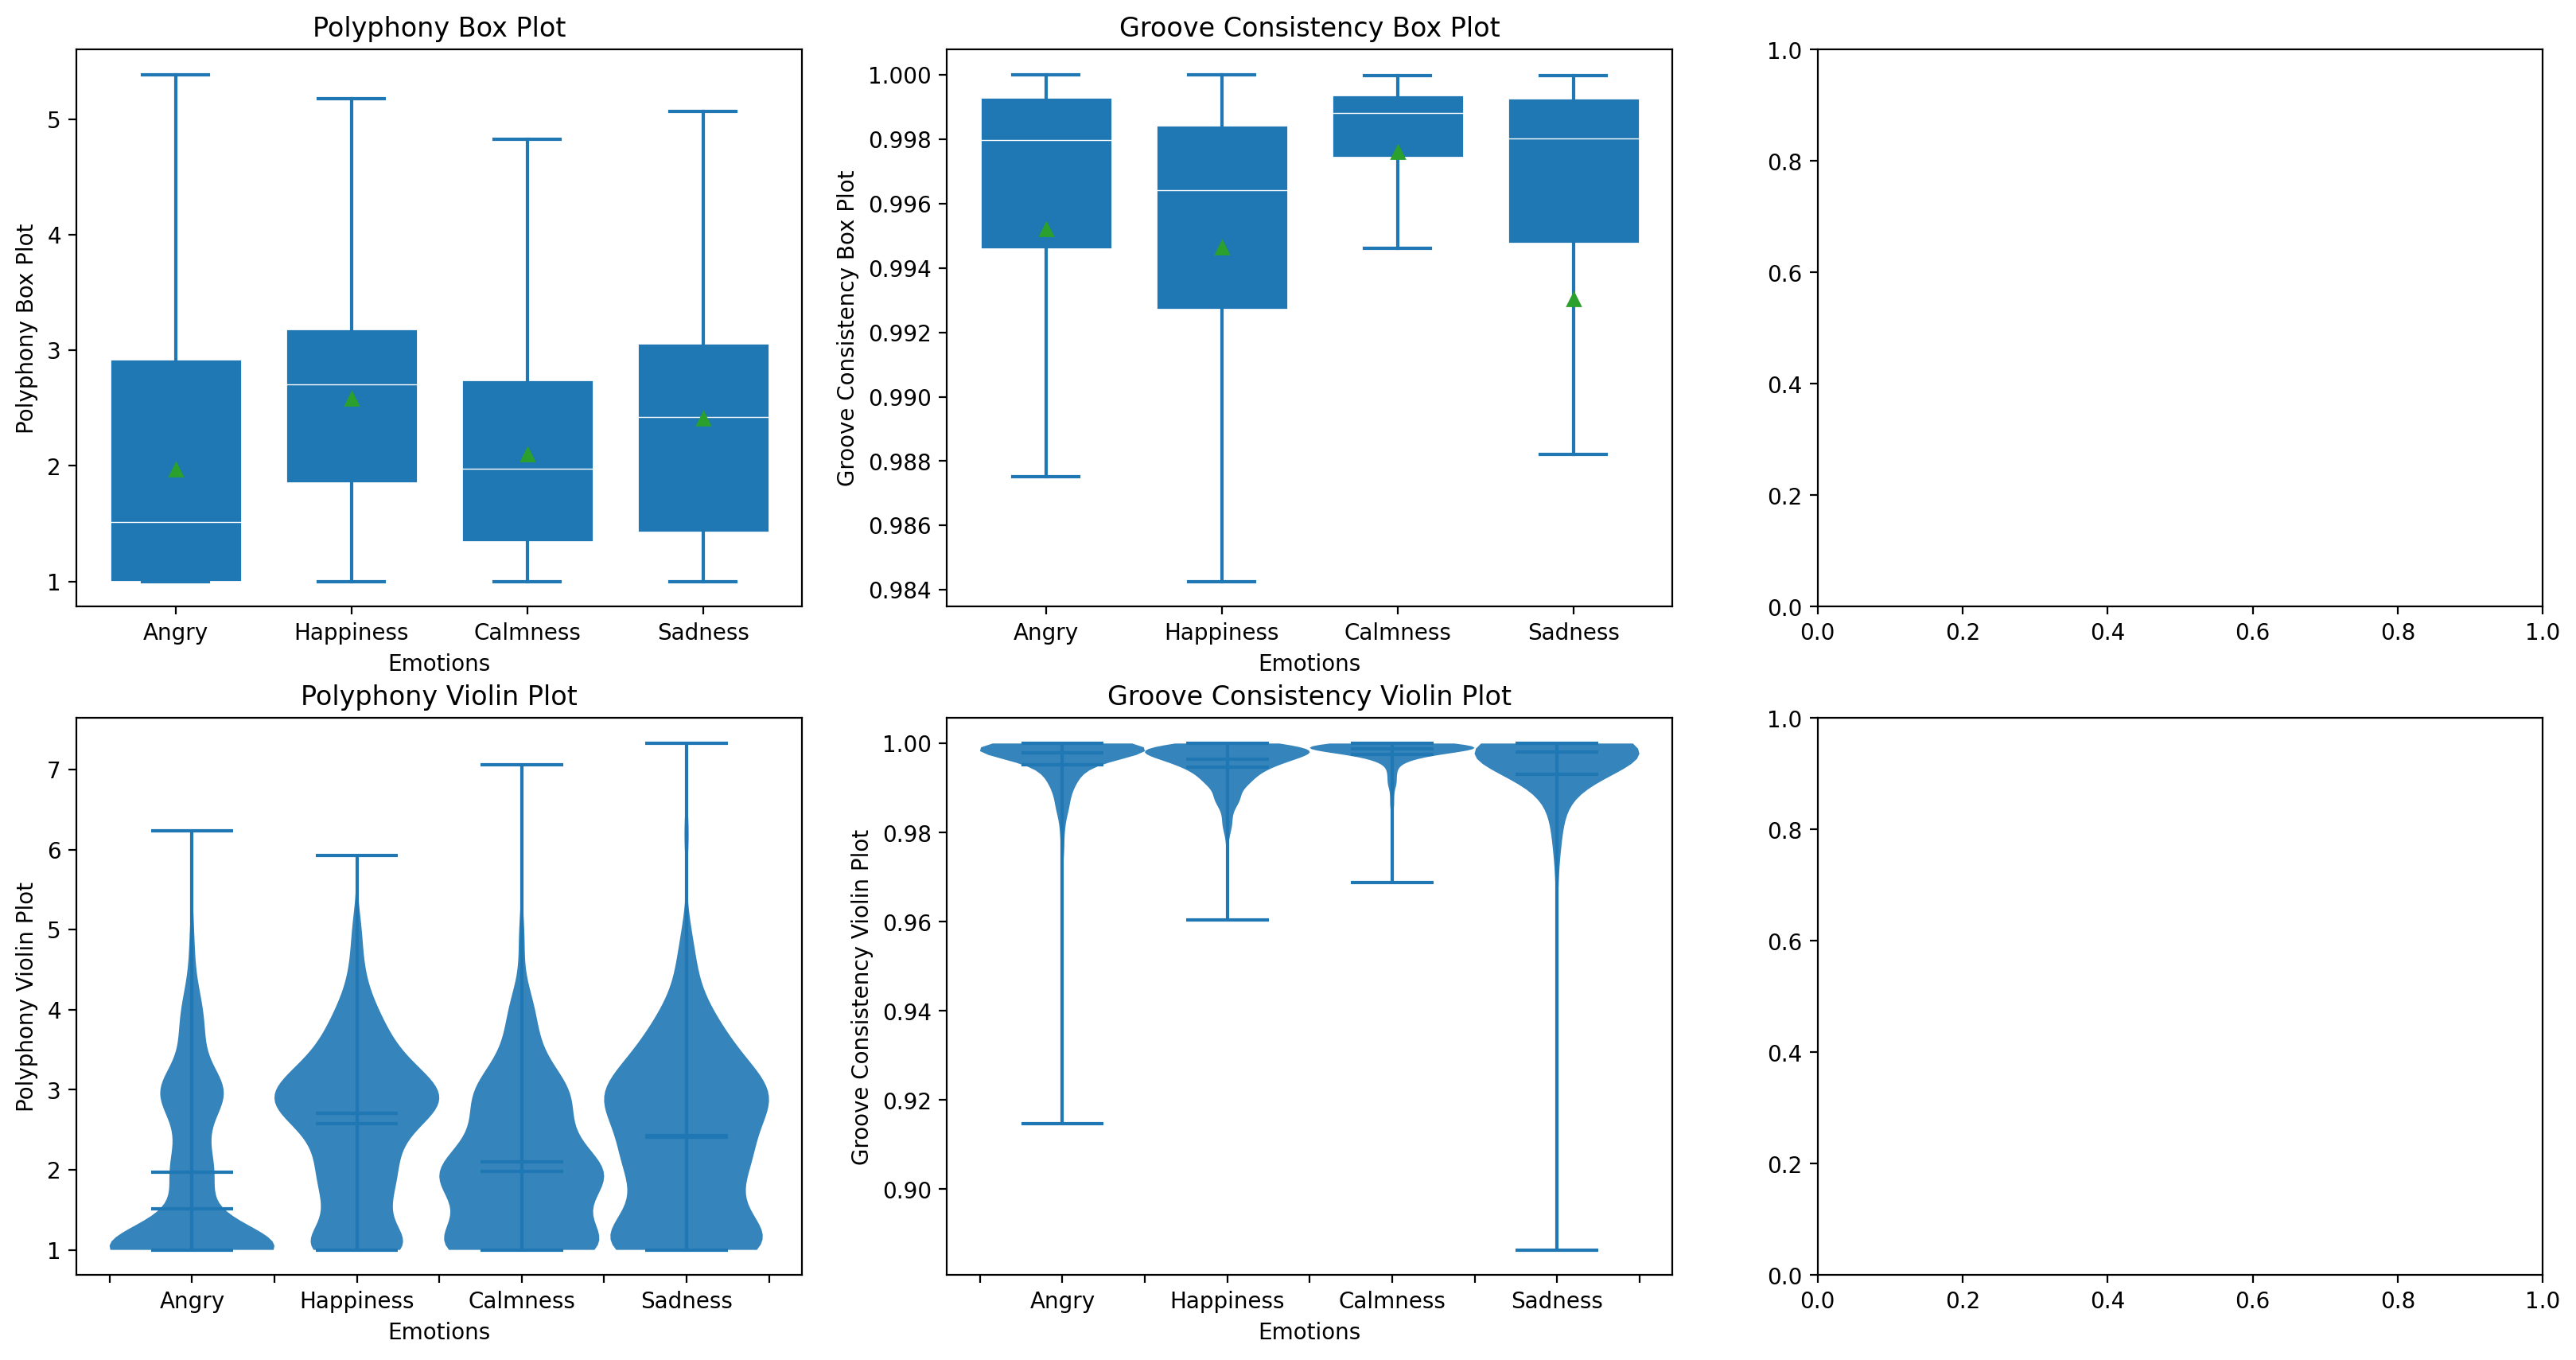

In [72]:
fig, ax = plt.subplots(2, 3, figsize=(20, 10))

# Note density average
angry = []
happiness = []
calmness = []
sadness = []

for midi in midi_data_list:
  num = midi['polyphony']
  if (midi['emotion'] == 'Angry'):
    angry.append(num)
  elif (midi['emotion'] == 'Happiness'):
    happiness.append(num)
  elif (midi['emotion'] == 'Calmness'):
    calmness.append(num)
  elif (midi['emotion'] == 'Sadness'):
    sadness.append(num)

points = (angry, happiness, calmness, sadness)
ax[0, 0], vp = box_plot(ax[0, 0], points, 'Polyphony Box Plot')


# Note length average
angry = []
happiness = []
calmness = []
sadness = []

for midi in midi_data_list:
  num = midi['groove_consistency']
  if (midi['emotion'] == 'Angry'):
    angry.append(num)
  elif (midi['emotion'] == 'Happiness'):
    happiness.append(num)
  elif (midi['emotion'] == 'Calmness'):
    calmness.append(num)
  elif (midi['emotion'] == 'Sadness'):
    sadness.append(num)

points = (angry, happiness, calmness, sadness)
ax[0, 1], vp = box_plot(ax[0, 1], points, 'Groove Consistency Box Plot')


# # Note velocity average
# angry = []
# happiness = []
# calmness = []
# sadness = []

# for midi in midi_data_list:
#   num = midi['pitch_entropy']
#   if (midi['emotion'] == 'Angry'):
#     angry.append(num)
#   elif (midi['emotion'] == 'Happiness'):
#     happiness.append(num)
#   elif (midi['emotion'] == 'Calmness'):
#     calmness.append(num)
#   elif (midi['emotion'] == 'Sadness'):
#     sadness.append(num)

# points = (angry, happiness, calmness, sadness)
# ax[0, 2], vp = box_plot(ax[0, 2], points, 'Pitch Entropy Box Plot')




# Note density average
angry = []
happiness = []
calmness = []
sadness = []

for midi in midi_data_list:
  num = midi['polyphony']
  if (midi['emotion'] == 'Angry'):
    angry.append(num)
  elif (midi['emotion'] == 'Happiness'):
    happiness.append(num)
  elif (midi['emotion'] == 'Calmness'):
    calmness.append(num)
  elif (midi['emotion'] == 'Sadness'):
    sadness.append(num)

points = (angry, happiness, calmness, sadness)
ax[1, 0], vp = violin_plot(ax[1, 0], points, 'Polyphony Violin Plot')


# Note length average
angry = []
happiness = []
calmness = []
sadness = []

for midi in midi_data_list:
  num = midi['groove_consistency']
  if (midi['emotion'] == 'Angry'):
    angry.append(num)
  elif (midi['emotion'] == 'Happiness'):
    happiness.append(num)
  elif (midi['emotion'] == 'Calmness'):
    calmness.append(num)
  elif (midi['emotion'] == 'Sadness'):
    sadness.append(num)

points = (angry, happiness, calmness, sadness)
ax[1, 1], vp = violin_plot(ax[1, 1], points, 'Groove Consistency Violin Plot')


# # Note velocity average
# angry = []
# happiness = []
# calmness = []
# sadness = []

# for midi in midi_data_list:
#   num = midi['pitch_entropy']
#   if (midi['emotion'] == 'Angry'):
#     angry.append(num)
#   elif (midi['emotion'] == 'Happiness'):
#     happiness.append(num)
#   elif (midi['emotion'] == 'Calmness'):
#     calmness.append(num)
#   elif (midi['emotion'] == 'Sadness'):
#     sadness.append(num)

# points = (angry, happiness, calmness, sadness)
# ax[1, 2], vp = violin_plot(ax[1, 2], points, 'Pitch Entropy Violin Plot')

plt.show()